In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('training_set_features.csv')

In [3]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [4]:
y_variable = pd.read_csv('training_set_labels.csv')

In [5]:
y_variable

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [6]:
df = pd.merge(df,y_variable,on = 'respondent_id')

In [7]:
((df.isnull().sum()/len(df) * 100  ))

respondent_id                   0.000000
h1n1_concern                    0.344479
h1n1_knowledge                  0.434343
behavioral_antiviral_meds       0.265848
behavioral_avoidance            0.778822
behavioral_face_mask            0.071142
behavioral_wash_hands           0.157262
behavioral_large_gatherings     0.325757
behavioral_outside_home         0.307036
behavioral_touch_face           0.479275
doctor_recc_h1n1                8.087767
doctor_recc_seasonal            8.087767
chronic_med_condition           3.635751
child_under_6_months            3.070356
health_worker                   3.010447
health_insurance               45.957989
opinion_h1n1_vacc_effective     1.464036
opinion_h1n1_risk               1.452803
opinion_h1n1_sick_from_vacc     1.479013
opinion_seas_vacc_effective     1.729884
opinion_seas_risk               1.924589
opinion_seas_sick_from_vacc     2.010709
age_group                       0.000000
education                       5.268282
race            

In [8]:
missing_more = ['health_insurance','employment_industry','employment_occupation']

In [9]:
from sklearn.impute import KNNImputer,SimpleImputer

In [10]:
knn = KNNImputer()
Sp = SimpleImputer(strategy='median')

In [11]:
df.dtypes != 'O'

respondent_id                   True
h1n1_concern                    True
h1n1_knowledge                  True
behavioral_antiviral_meds       True
behavioral_avoidance            True
behavioral_face_mask            True
behavioral_wash_hands           True
behavioral_large_gatherings     True
behavioral_outside_home         True
behavioral_touch_face           True
doctor_recc_h1n1                True
doctor_recc_seasonal            True
chronic_med_condition           True
child_under_6_months            True
health_worker                   True
health_insurance                True
opinion_h1n1_vacc_effective     True
opinion_h1n1_risk               True
opinion_h1n1_sick_from_vacc     True
opinion_seas_vacc_effective     True
opinion_seas_risk               True
opinion_seas_sick_from_vacc     True
age_group                      False
education                      False
race                           False
sex                            False
income_poverty                 False
m

In [12]:
numerical_feature = [feature for feature in df.columns if (df[feature].dtypes) != 'O' ]

In [13]:
numerical_feature

['respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children',
 'h1n1_vaccine',
 'seasonal_vaccine']

In [14]:
numerical_feature = numerical_feature[1:-2]

In [15]:
numerical_feature

['h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_large_gatherings',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'chronic_med_condition',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'household_adults',
 'household_children']

In [16]:
len(numerical_feature)

23

In [17]:
print("Before replacing a missing values")
for feature in df[numerical_feature]:
    print(f'{feature} :- {df[feature].unique()}')
    print("----------------------------------------------")

Before replacing a missing values
h1n1_concern :- [ 1.  3.  2.  0. nan]
----------------------------------------------
h1n1_knowledge :- [ 0.  2.  1. nan]
----------------------------------------------
behavioral_antiviral_meds :- [ 0.  1. nan]
----------------------------------------------
behavioral_avoidance :- [ 0.  1. nan]
----------------------------------------------
behavioral_face_mask :- [ 0.  1. nan]
----------------------------------------------
behavioral_wash_hands :- [ 0.  1. nan]
----------------------------------------------
behavioral_large_gatherings :- [ 0.  1. nan]
----------------------------------------------
behavioral_outside_home :- [ 1.  0. nan]
----------------------------------------------
behavioral_touch_face :- [ 1.  0. nan]
----------------------------------------------
doctor_recc_h1n1 :- [ 0. nan  1.]
----------------------------------------------
doctor_recc_seasonal :- [ 0. nan  1.]
----------------------------------------------
chronic_med_conditio

In [18]:

for feature in df[numerical_feature]:
    print(f'{df[feature].value_counts()/len(df)*100}')

2.0    39.596361
1.0    30.527577
3.0    17.190250
0.0    12.341334
Name: h1n1_concern, dtype: float64
1.0    54.659827
2.0    35.522522
0.0     9.383308
Name: h1n1_knowledge, dtype: float64
0.0    94.862770
1.0     4.871382
Name: behavioral_antiviral_meds, dtype: float64
1.0    71.996106
0.0    27.225072
Name: behavioral_avoidance, dtype: float64
0.0    93.035534
1.0     6.893324
Name: behavioral_face_mask, dtype: float64
1.0    82.431572
0.0    17.411166
Name: behavioral_wash_hands, dtype: float64
0.0    63.927060
1.0    35.747182
Name: behavioral_large_gatherings, dtype: float64
0.0    66.065077
1.0    33.627888
Name: behavioral_outside_home, dtype: float64
1.0    67.401805
0.0    32.118920
Name: behavioral_touch_face, dtype: float64
0.0    71.662860
1.0    20.249373
Name: doctor_recc_h1n1, dtype: float64
0.0    61.605572
1.0    30.306661
Name: doctor_recc_seasonal, dtype: float64
0.0    69.068035
1.0    27.296214
Name: chronic_med_condition, dtype: float64
0.0    88.924252
1.0     

In [19]:
before_missing_values = df.corr()

<AxesSubplot:>

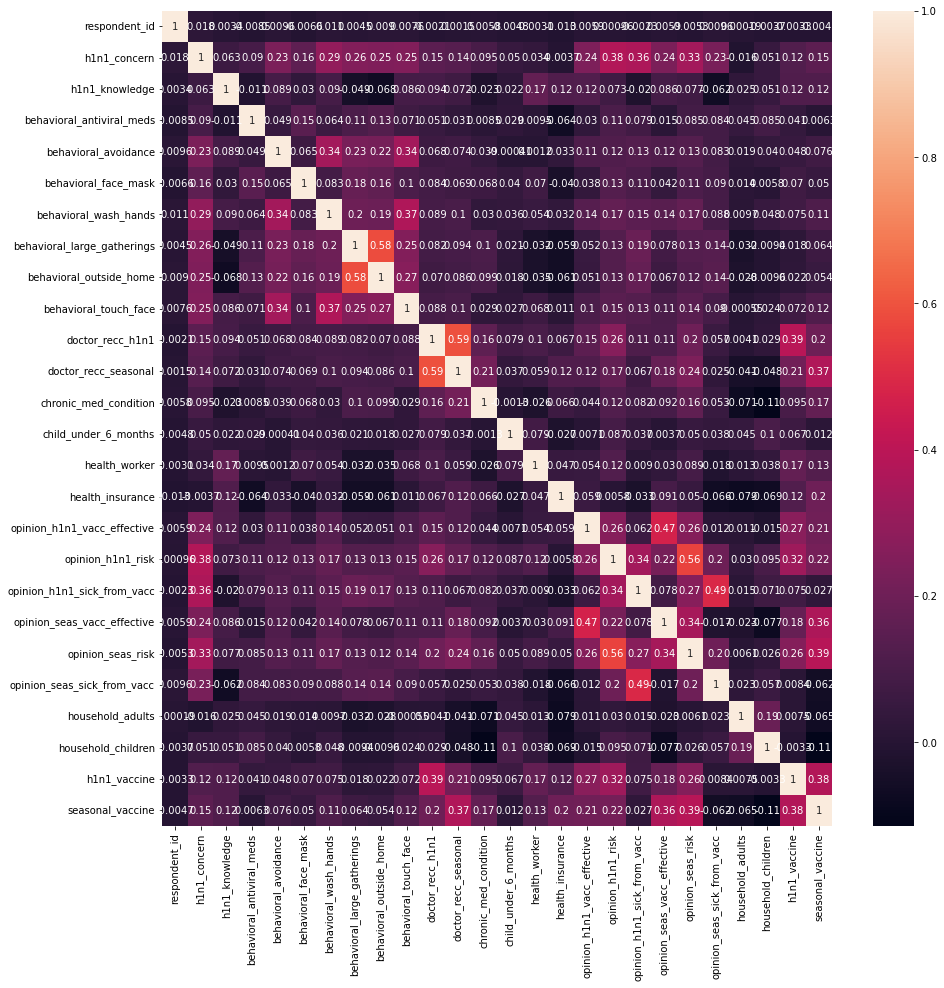

In [20]:
plt.figure(figsize=(15,15))
sns.heatmap(before_missing_values,annot=True,fmt='.2g')

In [21]:
df1 = df.copy()

In [22]:
df1[numerical_feature] = knn.fit_transform(df1[numerical_feature])

In [23]:
df1[numerical_feature] = np.round(df1[numerical_feature])

In [24]:
for feature in df[numerical_feature]:
    print(f'{df1[feature].value_counts()/len(df1)*100}')

2.0    39.731157
1.0    30.699817
3.0    17.208971
0.0    12.360055
Name: h1n1_concern, dtype: float64
1.0    55.023028
2.0    35.559966
0.0     9.417007
Name: h1n1_knowledge, dtype: float64
0.0    95.121129
1.0     4.878871
Name: behavioral_antiviral_meds, dtype: float64
1.0    72.505336
0.0    27.494664
Name: behavioral_avoidance, dtype: float64
0.0    93.099187
1.0     6.900813
Name: behavioral_face_mask, dtype: float64
1.0    82.566368
0.0    17.433632
Name: behavioral_wash_hands, dtype: float64
0.0    64.144232
1.0    35.855768
Name: behavioral_large_gatherings, dtype: float64
0.0    66.271015
1.0    33.728985
Name: behavioral_outside_home, dtype: float64
1.0    67.746284
0.0    32.253716
Name: behavioral_touch_face, dtype: float64
0.0    79.230164
1.0    20.769836
Name: doctor_recc_h1n1, dtype: float64
0.0    68.21807
1.0    31.78193
Name: doctor_recc_seasonal, dtype: float64
0.0    72.108436
1.0    27.891564
Name: chronic_med_condition, dtype: float64
0.0    91.972142
1.0     8.

In [25]:
numerical_feature1 = [feature for feature in df.columns if (df[feature].dtypes) != 'O' ]

In [26]:
after_1 = df1[numerical_feature1].corr()

<AxesSubplot:>

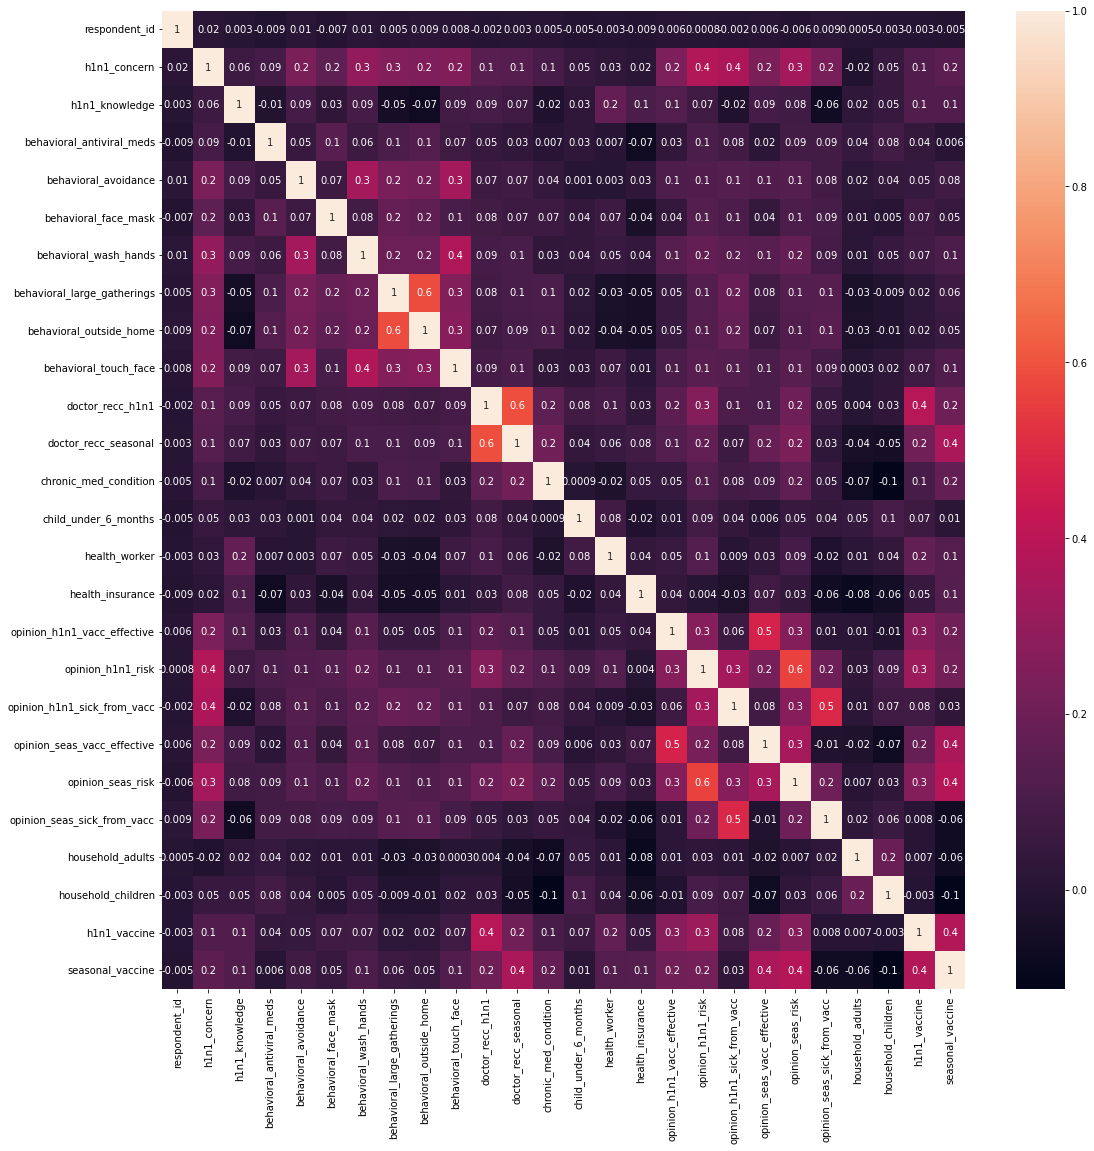

In [27]:
plt.figure(figsize=(18,18))
sns.heatmap(after_1,annot=True,fmt='.1g')

In [28]:
df2 = df.copy()

In [29]:
df2[numerical_feature] = Sp.fit_transform(df2[numerical_feature])

In [30]:
for feature in df[numerical_feature]:
    print(f'{df2[feature].value_counts()/len(df2)*100}')

2.0    39.940839
1.0    30.527577
3.0    17.190250
0.0    12.341334
Name: h1n1_concern, dtype: float64
1.0    55.094170
2.0    35.522522
0.0     9.383308
Name: h1n1_knowledge, dtype: float64
0.0    95.128618
1.0     4.871382
Name: behavioral_antiviral_meds, dtype: float64
1.0    72.774928
0.0    27.225072
Name: behavioral_avoidance, dtype: float64
0.0    93.106676
1.0     6.893324
Name: behavioral_face_mask, dtype: float64
1.0    82.588834
0.0    17.411166
Name: behavioral_wash_hands, dtype: float64
0.0    64.252818
1.0    35.747182
Name: behavioral_large_gatherings, dtype: float64
0.0    66.372112
1.0    33.627888
Name: behavioral_outside_home, dtype: float64
1.0    67.88108
0.0    32.11892
Name: behavioral_touch_face, dtype: float64
0.0    79.750627
1.0    20.249373
Name: doctor_recc_h1n1, dtype: float64
0.0    69.693339
1.0    30.306661
Name: doctor_recc_seasonal, dtype: float64
0.0    72.703786
1.0    27.296214
Name: chronic_med_condition, dtype: float64
0.0    91.994608
1.0     8.

In [31]:
after_2 = df2[numerical_feature1].corr()

<AxesSubplot:>

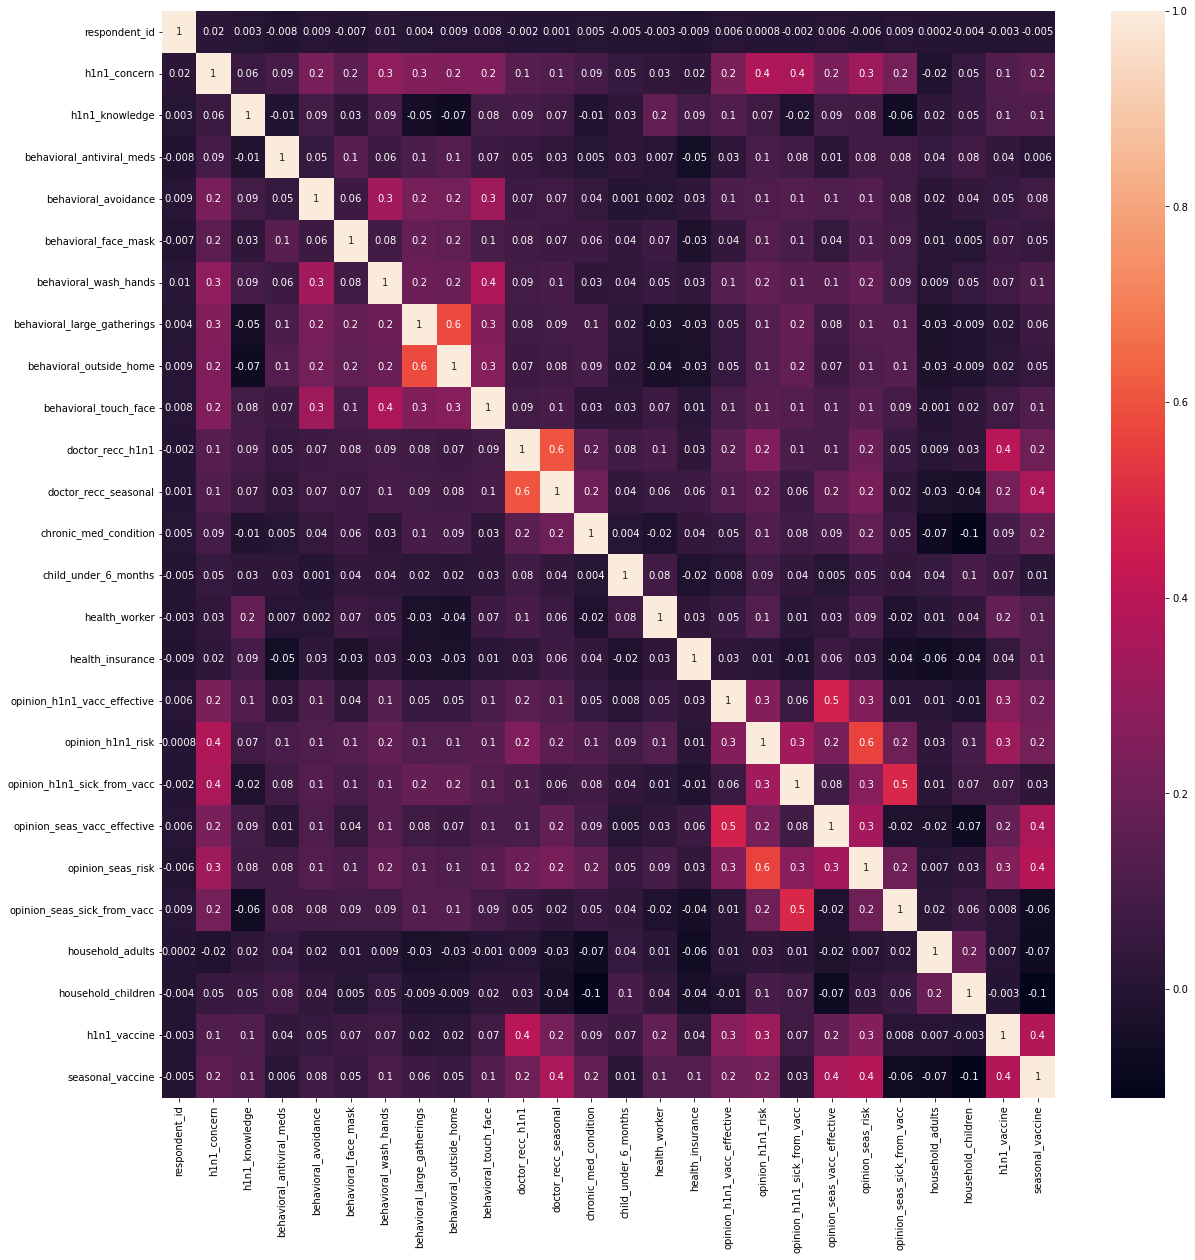

In [32]:
plt.figure(figsize=(20,20))
sns.heatmap(after_2,annot=True,fmt='.1g')

In [33]:
df['health_insurance'].isnull().sum()

12274

In [34]:
categorical_values = [feature for feature in df.columns 
                      if (df[feature].dtypes == 'O') ]

In [35]:
categorical_values

['age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'employment_industry',
 'employment_occupation']

In [36]:
sm = SimpleImputer(strategy='most_frequent')

In [37]:
df1[categorical_values]=sm.fit_transform(df1[categorical_values])

##### Before replacing a missing value

In [38]:
df['health_insurance'].value_counts()

1.0    12697
0.0     1736
Name: health_insurance, dtype: int64

In [39]:
df['health_insurance'].value_counts()/len(df)*100

1.0    47.541843
0.0     6.500168
Name: health_insurance, dtype: float64

In [40]:
df['employment_industry'].value_counts()

fcxhlnwr    2468
wxleyezf    1804
ldnlellj    1231
pxcmvdjn    1037
atmlpfrs     926
arjwrbjb     871
xicduogh     851
mfikgejo     614
vjjrobsf     527
rucpziij     523
xqicxuve     511
saaquncn     338
cfqqtusy     325
nduyfdeo     286
mcubkhph     275
wlfvacwt     215
dotnnunm     201
haxffmxo     148
msuufmds     124
phxvnwax      89
qnlwzans      13
Name: employment_industry, dtype: int64

In [41]:
df['employment_industry'].value_counts()/len(df)*100

fcxhlnwr    9.241023
wxleyezf    6.754783
ldnlellj    4.609278
pxcmvdjn    3.882877
atmlpfrs    3.467256
arjwrbjb    3.261317
xicduogh    3.186431
mfikgejo    2.299023
vjjrobsf    1.973265
rucpziij    1.958288
xqicxuve    1.913356
saaquncn    1.265586
cfqqtusy    1.216909
nduyfdeo    1.070880
mcubkhph    1.029693
wlfvacwt    0.805032
dotnnunm    0.752612
haxffmxo    0.554162
msuufmds    0.464298
phxvnwax    0.333246
qnlwzans    0.048676
Name: employment_industry, dtype: float64

In [42]:
df['employment_occupation'].value_counts()

xtkaffoo    1778
mxkfnird    1509
emcorrxb    1270
cmhcxjea    1247
xgwztkwe    1082
hfxkjkmi     766
qxajmpny     548
xqwwgdyp     485
kldqjyjy     469
uqqtjvyb     452
tfqavkke     388
ukymxvdu     372
vlluhbov     354
oijqvulv     344
ccgxvspp     341
bxpfxfdn     331
haliazsg     296
rcertsgn     276
xzmlyyjv     248
dlvbwzss     227
hodpvpew     208
dcjcmpih     148
pvmttkik      98
Name: employment_occupation, dtype: int64

In [43]:
df['employment_occupation'].value_counts()/len(df)*100

xtkaffoo    6.657431
mxkfnird    5.650204
emcorrxb    4.755308
cmhcxjea    4.669188
xgwztkwe    4.051372
hfxkjkmi    2.868162
qxajmpny    2.051897
xqwwgdyp    1.816003
kldqjyjy    1.756094
uqqtjvyb    1.692440
tfqavkke    1.452803
ukymxvdu    1.392893
vlluhbov    1.325495
oijqvulv    1.288052
ccgxvspp    1.276819
bxpfxfdn    1.239375
haliazsg    1.108324
rcertsgn    1.033437
xzmlyyjv    0.928595
dlvbwzss    0.849964
hodpvpew    0.778822
dcjcmpih    0.554162
pvmttkik    0.366945
Name: employment_occupation, dtype: float64

#### After replacing missing values

In [44]:
df1['health_insurance'].value_counts()

1.0    24690
0.0     2017
Name: health_insurance, dtype: int64

In [45]:
df1['health_insurance'].value_counts()/len(df1)*100

1.0    92.447673
0.0     7.552327
Name: health_insurance, dtype: float64

In [46]:
df1['employment_industry'].value_counts()

fcxhlnwr    15798
wxleyezf     1804
ldnlellj     1231
pxcmvdjn     1037
atmlpfrs      926
arjwrbjb      871
xicduogh      851
mfikgejo      614
vjjrobsf      527
rucpziij      523
xqicxuve      511
saaquncn      338
cfqqtusy      325
nduyfdeo      286
mcubkhph      275
wlfvacwt      215
dotnnunm      201
haxffmxo      148
msuufmds      124
phxvnwax       89
qnlwzans       13
Name: employment_industry, dtype: int64

In [47]:
df1['employment_occupation'].value_counts()

xtkaffoo    15248
mxkfnird     1509
emcorrxb     1270
cmhcxjea     1247
xgwztkwe     1082
hfxkjkmi      766
qxajmpny      548
xqwwgdyp      485
kldqjyjy      469
uqqtjvyb      452
tfqavkke      388
ukymxvdu      372
vlluhbov      354
oijqvulv      344
ccgxvspp      341
bxpfxfdn      331
haliazsg      296
rcertsgn      276
xzmlyyjv      248
dlvbwzss      227
hodpvpew      208
dcjcmpih      148
pvmttkik       98
Name: employment_occupation, dtype: int64

In [48]:
df = df.dropna(subset=['health_insurance', 'employment_industry', 'employment_occupation'])

In [49]:
df.shape

(7353, 38)

In [50]:
df.isnull().sum()

respondent_id                    0
h1n1_concern                     9
h1n1_knowledge                  27
behavioral_antiviral_meds       12
behavioral_avoidance            39
behavioral_face_mask             4
behavioral_wash_hands            6
behavioral_large_gatherings     16
behavioral_outside_home         11
behavioral_touch_face           20
doctor_recc_h1n1               151
doctor_recc_seasonal           151
chronic_med_condition           54
child_under_6_months             0
health_worker                    6
health_insurance                 0
opinion_h1n1_vacc_effective     19
opinion_h1n1_risk                7
opinion_h1n1_sick_from_vacc      2
opinion_seas_vacc_effective     11
opinion_seas_risk                5
opinion_seas_sick_from_vacc      2
age_group                        0
education                       27
race                             0
sex                              0
income_poverty                 543
marital_status                  33
rent_or_own         

In [51]:
df[numerical_feature] = knn.fit_transform(df[numerical_feature])

In [52]:
df[numerical_feature] = np.round(df[numerical_feature]).astype(int)

In [53]:
df[categorical_values]=sm.fit_transform(df[categorical_values])

In [54]:
df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

In [55]:
from sklearn.preprocessing import LabelEncoder

In [56]:
lr = LabelEncoder()

In [57]:
categorical_columns = df.select_dtypes(include="object").columns

In [58]:
categorical_columns

Index(['age_group', 'education', 'race', 'sex', 'income_poverty',
       'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
       'census_msa', 'employment_industry', 'employment_occupation'],
      dtype='object')

In [59]:
def catecoding(df,features):
    for feature in features:
        df[feature] = lr.fit_transform(df[feature])

In [60]:
catecoding(df,['age_group', 'education', 'race', 'sex', 'income_poverty',
               'marital_status', 'rent_or_own', 'employment_status', 'hhs_geo_region',
               'census_msa', 'employment_industry', 'employment_occupation'])

In [61]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
1,1,3,2,0,1,0,1,0,1,1,...,1,0,1,0,0,0,12,19,0,1
7,7,1,0,0,1,0,1,0,0,1,...,0,0,1,2,2,0,12,20,1,1
10,10,2,1,0,1,0,1,1,0,0,...,1,0,6,0,2,0,19,13,1,1
11,11,1,2,0,1,0,1,0,0,0,...,0,0,8,2,1,2,19,1,1,1
15,15,1,1,0,1,0,0,0,0,0,...,0,0,6,0,1,3,18,5,0,0


In [62]:
df.dtypes

respondent_id                  int64
h1n1_concern                   int32
h1n1_knowledge                 int32
behavioral_antiviral_meds      int32
behavioral_avoidance           int32
behavioral_face_mask           int32
behavioral_wash_hands          int32
behavioral_large_gatherings    int32
behavioral_outside_home        int32
behavioral_touch_face          int32
doctor_recc_h1n1               int32
doctor_recc_seasonal           int32
chronic_med_condition          int32
child_under_6_months           int32
health_worker                  int32
health_insurance               int32
opinion_h1n1_vacc_effective    int32
opinion_h1n1_risk              int32
opinion_h1n1_sick_from_vacc    int32
opinion_seas_vacc_effective    int32
opinion_seas_risk              int32
opinion_seas_sick_from_vacc    int32
age_group                      int32
education                      int32
race                           int32
sex                            int32
income_poverty                 int32
m

In [63]:
x = df.iloc[:,0:-2]

In [64]:
x


,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
1,1,3,2,0,1,0,1,0,1,1,...,2,1,1,0,1,0,0,0,12,19
7,7,1,0,0,1,0,1,0,0,1,...,0,0,0,0,1,2,2,0,12,20
10,10,2,1,0,1,0,1,1,0,0,...,0,0,1,0,6,0,2,0,19,13
11,11,1,2,0,1,0,1,0,0,0,...,1,0,0,0,8,2,1,2,19,1
15,15,1,1,0,1,0,0,0,0,0,...,1,0,0,0,6,0,1,3,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26690,26690,0,2,0,0,0,1,0,0,1,...,0,0,0,0,7,1,2,1,7,11
26696,26696,2,1,0,1,0,1,0,1,1,...,0,0,0,0,1,1,1,0,15,10
26699,26699,2,2,0,1,0,1,1,0,1,...,0,0,0,0,9,0,1,0,12,19
26703,26703,1,2,0,1,0,1,0,0,0,...,0,1,1,0,6,1,1,0,4,2


In [65]:
y = df.iloc[:,-2]

In [66]:
y1 = df.iloc[:,-1]

In [67]:
y

1        0
7        1
10       1
11       1
15       0
        ..
26690    0
26696    1
26699    0
26703    0
26705    0
Name: h1n1_vaccine, Length: 7353, dtype: int64

In [68]:
y1

1        1
7        1
10       1
11       1
15       0
        ..
26690    0
26696    1
26699    0
26703    0
26705    0
Name: seasonal_vaccine, Length: 7353, dtype: int64

In [69]:
final_y = np.vstack((y, y1)).T

In [70]:
from sklearn.model_selection import train_test_split

In [71]:
y_variable

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0
...,...,...,...
26702,26702,0,0
26703,26703,0,0
26704,26704,0,1
26705,26705,0,0


In [72]:
df.iloc[:,-2:]

,h1n1_vaccine,seasonal_vaccine
1,0,1
7,1,1
10,1,1
11,1,1
15,0,0
...,...,...
26690,0,0
26696,1,1
26699,0,0
26703,0,0


In [73]:
x_train,x_test,y_train,y_test = train_test_split(x,df.iloc[:,-2:],test_size=0.30,random_state=42)

In [74]:
y_train

,h1n1_vaccine,seasonal_vaccine
16714,1,1
11086,0,1
12485,0,0
2308,0,0
11754,0,0
...,...,...
18900,0,1
19042,0,0
19643,0,0
3204,1,1


In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
from mlxtend.feature_selection import SequentialFeatureSelector

In [79]:
from sklearn.multioutput import MultiOutputClassifier

In [78]:
rf = RandomForestClassifier()

In [79]:
from catboost import CatBoostClassifier

In [80]:
sfs = SequentialFeatureSelector(rf,k_features=(1,x_train.shape[1]),forward=True,verbose = 2,scoring='accuracy')

In [81]:
sfs.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   20.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:  2.2min finished

[2023-02-23 12:22:32] Features: 1/36 -- score: 0.5793650164642834[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   15.6s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.8min finished

[2023-02-23 12:24:18] Features: 2/36 -- score: 0.6116148206855557[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    5.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:  1.9min finished

[2023-02-23 12:26:12] Features: 3/36 -- score: 0.6221072395671168[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=RandomForestClassifier(),
                          k_features=(1, 36), scoring='accuracy', verbose=2)

In [82]:
dict1 = pd.DataFrame.from_dict(sfs.get_metric_dict()).T

In [83]:
dict1

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(17,)","[0.5912621359223301, 0.5757281553398058, 0.566...",0.579365,"(opinion_h1n1_risk,)",0.01049,0.008161,0.004081
2,"(17, 20)","[0.6223300970873786, 0.6194174757281553, 0.587...",0.611615,"(opinion_h1n1_risk, opinion_seas_risk)",0.017972,0.013982,0.006991
3,"(10, 17, 20)","[0.6359223300970874, 0.6223300970873786, 0.617...",0.622107,"(doctor_recc_h1n1, opinion_h1n1_risk, opinion_...",0.009219,0.007173,0.003586
4,"(10, 15, 17, 20)","[0.6427184466019418, 0.6310679611650486, 0.624...",0.630267,"(doctor_recc_h1n1, health_insurance, opinion_h...",0.00845,0.006574,0.003287
5,"(10, 11, 15, 17, 20)","[0.6533980582524271, 0.6310679611650486, 0.630...",0.637457,"(doctor_recc_h1n1, doctor_recc_seasonal, healt...",0.014011,0.010901,0.005451
6,"(10, 11, 15, 16, 17, 20)","[0.6504854368932039, 0.6349514563106796, 0.634...",0.638623,"(doctor_recc_h1n1, doctor_recc_seasonal, healt...",0.011605,0.009029,0.004515
7,"(10, 11, 14, 15, 16, 17, 20)","[0.6514563106796116, 0.6320388349514563, 0.643...",0.640761,"(doctor_recc_h1n1, doctor_recc_seasonal, healt...",0.013816,0.010749,0.005375
8,"(10, 11, 14, 15, 16, 17, 19, 20)","[0.6388349514563106, 0.629126213592233, 0.6443...",0.643097,"(doctor_recc_h1n1, doctor_recc_seasonal, healt...",0.011464,0.00892,0.00446
9,"(8, 10, 11, 14, 15, 16, 17, 19, 20)","[0.6407766990291263, 0.6368932038834951, 0.652...",0.646399,"(behavioral_outside_home, doctor_recc_h1n1, do...",0.009017,0.007016,0.003508
10,"(8, 10, 11, 14, 15, 16, 17, 19, 20, 23)","[0.6359223300970874, 0.6368932038834951, 0.652...",0.642513,"(behavioral_outside_home, doctor_recc_h1n1, do...",0.007592,0.005907,0.002953


In [77]:
from lightgbm import LGBMClassifier

In [80]:
sfs1 = SequentialFeatureSelector(MultiOutputClassifier(LGBMClassifier()),k_features=(1,x_train.shape[1]),forward=True,
                                 verbose = 2,scoring='accuracy')

In [81]:
sfs1.fit(x_train,y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  36 out of  36 | elapsed:   17.1s finished

[2023-02-23 17:46:55] Features: 1/36 -- score: 0.5793650164642834[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:   28.0s finished

[2023-02-23 17:47:24] Features: 2/36 -- score: 0.6123928406313983[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  34 out of  34 | elapsed:   41.8s finished

[2023-02-23 17:48:05] Features: 3/36 -- score: 0.6226925943747819[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  

SequentialFeatureSelector(estimator=MultiOutputClassifier(estimator=LGBMClassifier()),
                          k_features=(1, 36), scoring='accuracy', verbose=2)

In [82]:
sfs1.k_score_

0.684672082425203

In [83]:
sfs1.k_feature_names_

('h1n1_concern',
 'h1n1_knowledge',
 'behavioral_face_mask',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'sex',
 'marital_status',
 'rent_or_own',
 'employment_status',
 'hhs_geo_region',
 'employment_industry')

In [84]:
y_train

,h1n1_vaccine,seasonal_vaccine
16714,1,1
11086,0,1
12485,0,0
2308,0,0
11754,0,0
...,...,...
18900,0,1
19042,0,0
19643,0,0
3204,1,1


In [85]:
x_train

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
16714,16714,2,1,0,1,0,1,0,0,1,...,0,0,0,0,8,1,1,1,18,5
11086,11086,3,2,0,0,0,1,0,0,0,...,0,1,0,0,9,0,0,0,1,10
12485,12485,2,2,0,1,0,1,0,1,1,...,1,0,0,0,9,0,1,0,18,5
2308,2308,2,1,0,1,0,0,0,0,1,...,0,0,0,0,5,1,1,2,12,14
11754,11754,1,2,0,1,0,1,0,0,1,...,0,1,1,0,3,1,1,0,8,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,18900,2,1,0,0,0,0,0,0,0,...,1,0,0,0,8,1,3,1,3,7
19042,19042,1,2,0,1,0,1,0,0,1,...,0,1,1,0,7,1,0,0,18,5
19643,19643,2,2,0,0,0,1,0,0,1,...,0,1,1,0,3,1,0,0,12,19
3204,3204,3,2,0,1,0,1,0,1,1,...,1,0,0,0,1,0,1,0,19,13


In [86]:
y_train

,h1n1_vaccine,seasonal_vaccine
16714,1,1
11086,0,1
12485,0,0
2308,0,0
11754,0,0
...,...,...
18900,0,1
19042,0,0
19643,0,0
3204,1,1


In [92]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs

(<Figure size 1080x432 with 1 Axes>,
 <AxesSubplot:xlabel='Number of Features', ylabel='Performance'>)

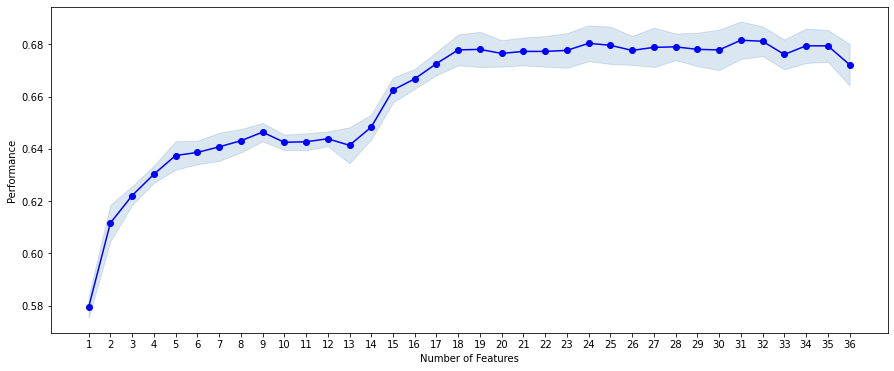

In [93]:
plot_sfs(sfs.get_metric_dict(), kind='std_err', figsize=(15,6))

In [94]:
sfs.k_feature_names_

('respondent_id',
 'h1n1_concern',
 'h1n1_knowledge',
 'behavioral_antiviral_meds',
 'behavioral_avoidance',
 'behavioral_face_mask',
 'behavioral_wash_hands',
 'behavioral_outside_home',
 'behavioral_touch_face',
 'doctor_recc_h1n1',
 'doctor_recc_seasonal',
 'child_under_6_months',
 'health_worker',
 'health_insurance',
 'opinion_h1n1_vacc_effective',
 'opinion_h1n1_risk',
 'opinion_h1n1_sick_from_vacc',
 'opinion_seas_vacc_effective',
 'opinion_seas_risk',
 'opinion_seas_sick_from_vacc',
 'age_group',
 'education',
 'race',
 'sex',
 'income_poverty',
 'employment_status',
 'hhs_geo_region',
 'census_msa',
 'household_adults',
 'employment_industry',
 'employment_occupation')

In [95]:
x_train = x_train.iloc[:,list(sfs.k_feature_idx_)]

In [96]:
x_test = x_test.iloc[:,list(sfs.k_feature_idx_)]

In [97]:
from sklearn.ensemble import RandomForestClassifier

In [98]:
rf = MultiOutputClassifier(RandomForestClassifier())

In [99]:
rf.fit(x_train,y_train)

MultiOutputClassifier(estimator=RandomForestClassifier())

In [100]:
rf.score(x_test,y_test)

0.6795104261106074

In [101]:
from xgboost import XGBClassifier

In [102]:
xg = MultiOutputClassifier(XGBClassifier())

In [103]:
xg.fit(x_train,y_train)

MultiOutputClassifier(estimator=XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=False,
                                              eval_metric=None,
                                              feature_types=None, gamma=None,
                                              gpu_id=None, grow_policy=None,
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=None, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None,
                                              max_depth=None, max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              predictor=None, random_state=None, ...))

In [104]:
xg.score(x_train,y_train)

0.9813483582669517

In [105]:
xg.score(x_test,y_test)

0.672257479601088

In [106]:
from sklearn.metrics import accuracy_score

In [107]:
import optuna

In [108]:
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=200),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'random_strength':trial.suggest_int("random_strength", 1,10),
        'bagging_temperature':trial.suggest_int("bagging_temperature", 0,10),
        'max_bin':trial.suggest_int('max_bin', 1,30),
        'grow_policy':trial.suggest_categorical('grow_policy', ['SymmetricTree', 'Depthwise', 'Lossguide']),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        "depth": trial.suggest_int("max_depth", 2,10),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
        'auto_class_weights':trial.suggest_categorical('auto_class_weights', ['Balanced', 'SqrtBalanced']),
        }
    from catboost import CatBoostClassifier
    model = MultiOutputClassifier(CatBoostClassifier(**param))
    model.fit(x_train, y_train, early_stopping_rounds=50, verbose=False)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred)
    return acc


In [110]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-02-23 14:07:54,277] A new study created in memory with name: no-name-a9f61bfc-c3d7-4c7b-9c5f-55e505de2632
[I 2023-02-23 14:07:57,469] Trial 0 finished with value: 0.6618313689936537 and parameters: {'iterations': 100, 'learning_rate': 0.09344121902065843, 'random_strength': 10, 'bagging_temperature': 3, 'max_bin': 17, 'grow_policy': 'SymmetricTree', 'min_data_in_leaf': 2, 'max_depth': 8, 'l2_leaf_reg': 0.005406138333385328, 'auto_class_weights': 'Balanced'}. Best is trial 0 with value: 0.6618313689936537.
[I 2023-02-23 14:07:59,886] Trial 1 finished with value: 0.6681776971894833 and parameters: {'iterations': 100, 'learning_rate': 0.1711597061280321, 'random_strength': 8, 'bagging_temperature': 8, 'max_bin': 21, 'grow_policy': 'Depthwise', 'min_data_in_leaf': 10, 'max_depth': 7, 'l2_leaf_reg': 0.5266002760250142, 'auto_class_weights': 'SqrtBalanced'}. Best is trial 1 with value: 0.6681776971894833.
[I 2023-02-23 14:08:10,033] Trial 2 finished with value: 0.6799637352674524 and

Since the combine both y1 and y1 leads to low accuracy, hence y1 and y2 are trained differntly

In [87]:
x_train,x_test,y_train,y_test = train_test_split(x,df.iloc[:,-2:],test_size=0.30,random_state=42)

In [88]:
y1_train = y_train['h1n1_vaccine']

In [89]:
y1_test = y_test['h1n1_vaccine']

In [90]:
y1_train

16714    1
11086    0
12485    0
2308     0
11754    0
        ..
18900    0
19042    0
19643    0
3204     1
26414    0
Name: h1n1_vaccine, Length: 5147, dtype: int64

In [91]:
y1_test

16545    0
5368     1
22139    0
15453    0
24483    0
        ..
15024    1
11024    0
21837    0
17988    0
10375    0
Name: h1n1_vaccine, Length: 2206, dtype: int64

In [92]:
y2_train = y_train['seasonal_vaccine']

In [93]:
y2_test = y_test['seasonal_vaccine']

In [94]:
sfs1.k_feature_idx_

(1,
 2,
 5,
 10,
 11,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 25,
 27,
 28,
 29,
 30,
 34)

In [95]:
x_train.iloc[:,list(sfs1.k_feature_idx_)]

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,doctor_recc_h1n1,doctor_recc_seasonal,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,employment_industry
16714,2,1,0,0,0,0,0,1,5,4,...,2,2,2,2,0,0,0,0,8,18
11086,3,2,0,0,1,0,0,1,5,2,...,4,2,3,0,1,1,0,0,9,1
12485,2,2,0,0,0,0,0,1,5,2,...,2,2,3,2,0,0,0,0,9,18
2308,2,1,0,0,0,0,0,0,5,2,...,4,1,2,3,1,0,0,0,5,12
11754,1,2,0,0,0,0,0,1,4,4,...,4,2,1,2,1,1,1,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,2,1,0,0,0,0,0,1,2,4,...,5,4,2,2,0,0,0,0,8,3
19042,1,2,0,0,0,0,0,1,4,2,...,2,1,1,2,1,1,1,0,7,18
19643,2,2,0,0,0,0,0,1,4,1,...,2,4,3,2,1,1,1,0,3,12
3204,3,2,0,0,0,0,0,1,4,1,...,1,1,4,3,1,0,0,0,1,19


In [96]:
x_train = x_train.iloc[:,list(sfs1.k_feature_idx_)]

In [97]:
x_test = x_test.iloc[:,list(sfs1.k_feature_idx_)]

In [98]:
x_train

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,doctor_recc_h1n1,doctor_recc_seasonal,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,employment_industry
16714,2,1,0,0,0,0,0,1,5,4,...,2,2,2,2,0,0,0,0,8,18
11086,3,2,0,0,1,0,0,1,5,2,...,4,2,3,0,1,1,0,0,9,1
12485,2,2,0,0,0,0,0,1,5,2,...,2,2,3,2,0,0,0,0,9,18
2308,2,1,0,0,0,0,0,0,5,2,...,4,1,2,3,1,0,0,0,5,12
11754,1,2,0,0,0,0,0,1,4,4,...,4,2,1,2,1,1,1,0,3,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18900,2,1,0,0,0,0,0,1,2,4,...,5,4,2,2,0,0,0,0,8,3
19042,1,2,0,0,0,0,0,1,4,2,...,2,1,1,2,1,1,1,0,7,18
19643,2,2,0,0,0,0,0,1,4,1,...,2,4,3,2,1,1,1,0,3,12
3204,3,2,0,0,0,0,0,1,4,1,...,1,1,4,3,1,0,0,0,1,19


In [99]:
x_test

,h1n1_concern,h1n1_knowledge,behavioral_face_mask,doctor_recc_h1n1,doctor_recc_seasonal,child_under_6_months,health_worker,health_insurance,opinion_h1n1_vacc_effective,opinion_h1n1_risk,...,opinion_seas_risk,opinion_seas_sick_from_vacc,age_group,education,sex,marital_status,rent_or_own,employment_status,hhs_geo_region,employment_industry
16545,1,1,0,0,0,0,0,1,4,2,...,2,1,3,2,1,0,0,0,2,18
5368,2,1,0,1,1,0,0,1,5,5,...,4,1,3,3,1,0,0,0,8,6
22139,2,2,0,0,1,0,0,1,5,2,...,4,1,0,3,1,0,1,0,8,2
15453,1,1,0,0,0,0,1,1,5,2,...,2,2,0,2,0,1,1,0,1,4
24483,2,2,0,0,0,0,0,1,4,1,...,1,2,2,2,1,1,0,0,7,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15024,3,2,0,1,1,0,0,1,5,2,...,4,1,4,2,0,1,0,0,2,12
11024,2,2,0,0,0,0,0,1,5,1,...,4,1,3,3,0,0,0,0,6,17
21837,2,2,0,0,0,0,0,1,4,4,...,4,2,1,2,0,0,0,0,9,8
17988,2,0,0,0,0,0,0,1,4,1,...,1,1,4,0,1,0,0,0,8,19


### Model Building

In [124]:
from xgboost import XGBClassifier

In [125]:
xg1 = XGBClassifier()
xg2 = XGBClassifier()

In [126]:
xg1.fit(x_train,y1_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [127]:
xg1.score(x_test,y1_test)

0.8182230281051677

In [128]:
xg2.fit(x_train,y2_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [129]:
xg2.score(x_test,y2_test)

0.785131459655485

In [130]:
pred1 = xg1.predict(x_test)

In [131]:
pred2 = xg2.predict(x_test)

In [132]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [133]:
print("------------------Xgboost Classifier---------------------------------")
print("For Y1 variable")
print("---------------------------------------------------------------------")
print(f'the Accuracy score for H1N1 vaccine : {accuracy_score(y1_test,pred1)}')
print("---------------------------------------------------------------------")
print(f'the classification report for H1N1 vaccine : {classification_report(y1_test,pred1)}')
print("---------------------------------------------------------------------")
print(f'the confusion matrix for H1N1 vaccine : {confusion_matrix(y1_test,pred1)}')
print("---------------------------------------------------------------------")
print("                                                                     ")
print("For Y2 variable")
print("---------------------------------------------------------------------")
print(f'the Accuracy score for Seasonal vaccine : {accuracy_score(y2_test,pred2)}')
print("---------------------------------------------------------------------")
print(f'the classification report for Seasonal vaccine : {classification_report(y2_test,pred2)}')
print("---------------------------------------------------------------------")
print(f'the confusion matrix for Seasonal vaccine : {confusion_matrix(y2_test,pred2)}')
print("---------------------------------------------------------------------")


------------------Xgboost Classifier---------------------------------
For Y1 variable
---------------------------------------------------------------------
the Accuracy score for H1N1 vaccine : 0.8182230281051677
---------------------------------------------------------------------
the classification report for H1N1 vaccine :               precision    recall  f1-score   support

           0       0.85      0.90      0.88      1567
           1       0.72      0.61      0.66       639

    accuracy                           0.82      2206
   macro avg       0.78      0.76      0.77      2206
weighted avg       0.81      0.82      0.81      2206

---------------------------------------------------------------------
the confusion matrix for H1N1 vaccine : [[1413  154]
 [ 247  392]]
---------------------------------------------------------------------
                                                                     
For Y2 variable
----------------------------------------------------

### Hyperparameter Tuning

In [100]:
from catboost import CatBoostClassifier

In [101]:
cb1 = CatBoostClassifier()
cb2 = CatBoostClassifier()

In [136]:
cb1.fit(x_train,y1_train)

Learning rate set to 0.020738
0:	learn: 0.6803722	total: 6.67ms	remaining: 6.66s
1:	learn: 0.6687439	total: 11.7ms	remaining: 5.85s
2:	learn: 0.6572458	total: 16.1ms	remaining: 5.34s
3:	learn: 0.6465035	total: 19.9ms	remaining: 4.96s
4:	learn: 0.6357043	total: 25.1ms	remaining: 4.99s
5:	learn: 0.6272717	total: 31.1ms	remaining: 5.15s
6:	learn: 0.6181183	total: 36.4ms	remaining: 5.17s
7:	learn: 0.6086853	total: 41.8ms	remaining: 5.18s
8:	learn: 0.6007648	total: 47.5ms	remaining: 5.23s
9:	learn: 0.5928932	total: 56ms	remaining: 5.54s
10:	learn: 0.5847179	total: 60.6ms	remaining: 5.45s
11:	learn: 0.5768649	total: 65.9ms	remaining: 5.42s
12:	learn: 0.5698803	total: 71.6ms	remaining: 5.43s
13:	learn: 0.5627964	total: 76.6ms	remaining: 5.39s
14:	learn: 0.5559482	total: 81.6ms	remaining: 5.36s
15:	learn: 0.5497538	total: 86.8ms	remaining: 5.34s
16:	learn: 0.5442694	total: 91.6ms	remaining: 5.3s
17:	learn: 0.5389291	total: 96.9ms	remaining: 5.29s
18:	learn: 0.5338865	total: 103ms	remaining: 5.

In [137]:
cb2.fit(x_train,y2_train)

Learning rate set to 0.020738
0:	learn: 0.6846603	total: 6.42ms	remaining: 6.41s
1:	learn: 0.6753007	total: 12.8ms	remaining: 6.39s
2:	learn: 0.6664324	total: 19.7ms	remaining: 6.55s
3:	learn: 0.6576043	total: 26.7ms	remaining: 6.65s
4:	learn: 0.6493559	total: 33.9ms	remaining: 6.75s
5:	learn: 0.6412299	total: 41.9ms	remaining: 6.94s
6:	learn: 0.6333924	total: 49.4ms	remaining: 7.01s
7:	learn: 0.6263197	total: 56.8ms	remaining: 7.04s
8:	learn: 0.6197188	total: 63.8ms	remaining: 7.02s
9:	learn: 0.6128964	total: 71.6ms	remaining: 7.09s
10:	learn: 0.6074001	total: 78.4ms	remaining: 7.05s
11:	learn: 0.6016073	total: 86ms	remaining: 7.08s
12:	learn: 0.5960343	total: 92.9ms	remaining: 7.06s
13:	learn: 0.5908881	total: 100ms	remaining: 7.08s
14:	learn: 0.5860752	total: 107ms	remaining: 7.04s
15:	learn: 0.5819071	total: 115ms	remaining: 7.08s
16:	learn: 0.5774384	total: 122ms	remaining: 7.04s
17:	learn: 0.5726699	total: 129ms	remaining: 7.02s
18:	learn: 0.5683053	total: 136ms	remaining: 7s
19:

In [138]:
pred_1 = cb1.predict(x_test)

In [139]:
pred_2 = cb2.predict(x_test)

In [140]:
print("------------------catboost Classifier---------------------------------")
print("For Y1 variable")
print("---------------------------------------------------------------------")
print(f'the Accuracy score for H1N1 vaccine : {accuracy_score(y1_test,pred_1)}')
print("---------------------------------------------------------------------")
print(f'the classification report for H1N1 vaccine : {classification_report(y1_test,pred_1)}')
print("---------------------------------------------------------------------")
print(f'the confusion matrix for H1N1 vaccine : {confusion_matrix(y1_test,pred_1)}')
print("---------------------------------------------------------------------")
print("                                                                     ")
print("For Y2 variable")
print("---------------------------------------------------------------------")
print(f'the Accuracy score for Seasonal vaccine : {accuracy_score(y2_test,pred_2)}')
print("---------------------------------------------------------------------")
print(f'the classification report for Seasonal vaccine : {classification_report(y2_test,pred_2)}')
print("---------------------------------------------------------------------")
print(f'the confusion matrix for Seasonal vaccine : {confusion_matrix(y2_test,pred_2)}')
print("---------------------------------------------------------------------")


------------------catboost Classifier---------------------------------
For Y1 variable
---------------------------------------------------------------------
the Accuracy score for H1N1 vaccine : 0.8340888485947416
---------------------------------------------------------------------
the classification report for H1N1 vaccine :               precision    recall  f1-score   support

           0       0.86      0.92      0.89      1567
           1       0.76      0.62      0.68       639

    accuracy                           0.83      2206
   macro avg       0.81      0.77      0.79      2206
weighted avg       0.83      0.83      0.83      2206

---------------------------------------------------------------------
the confusion matrix for H1N1 vaccine : [[1443  124]
 [ 242  397]]
---------------------------------------------------------------------
                                                                     
For Y2 variable
---------------------------------------------------

In [141]:
import optuna

In [142]:
def objective(trial):
    param = {
        'iterations': trial.suggest_int('iterations', 100, 1000, step=200),
        'learning_rate':trial.suggest_float("learning_rate", 0.001, 0.3),
        'min_data_in_leaf':trial.suggest_int("min_data_in_leaf", 1,10),
        "depth": trial.suggest_int("max_depth", 2,10),
        "l2_leaf_reg": trial.suggest_loguniform("l2_leaf_reg", 1e-8, 100),
        }
    from catboost import CatBoostClassifier
    model = CatBoostClassifier(**param)
    model.fit(x_train, y2_train, early_stopping_rounds=50, verbose=False)
    y_pred = model.predict(x_test)
    acc = accuracy_score(y2_test,y_pred)
    return acc

In [143]:
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=100)

[I 2023-02-23 14:16:54,553] A new study created in memory with name: no-name-3e5e5813-f33a-4997-9e06-92e20ca77d3e
[I 2023-02-23 14:16:55,390] Trial 0 finished with value: 0.7960108794197642 and parameters: {'iterations': 100, 'learning_rate': 0.03646094767432235, 'min_data_in_leaf': 8, 'max_depth': 5, 'l2_leaf_reg': 3.976137587022139e-05}. Best is trial 0 with value: 0.7960108794197642.
[I 2023-02-23 14:17:21,930] Trial 1 finished with value: 0.7611060743427017 and parameters: {'iterations': 900, 'learning_rate': 0.2304661861050819, 'min_data_in_leaf': 7, 'max_depth': 10, 'l2_leaf_reg': 2.2653406927014805e-06}. Best is trial 0 with value: 0.7960108794197642.
[I 2023-02-23 14:17:25,298] Trial 2 finished with value: 0.7733454215775158 and parameters: {'iterations': 100, 'learning_rate': 0.11372494369061441, 'min_data_in_leaf': 4, 'max_depth': 10, 'l2_leaf_reg': 1.054907329466677e-06}. Best is trial 0 with value: 0.7960108794197642.
[I 2023-02-23 14:17:29,004] Trial 3 finished with value:

In [144]:
study.best_params

{'iterations': 100,
 'learning_rate': 0.17562120184171204,
 'min_data_in_leaf': 3,
 'max_depth': 2,
 'l2_leaf_reg': 1.9027543954684612e-07}

In [145]:
study.best_value

0.8100634632819583

In [159]:
iterations = [int(x) for x in np.linspace(50,300,50)]
learning_rate = [round(float(x),1) for x in np.linspace(0.001,0.3,20)]
l2_leaf_reg = [round(float(x),1) for x in np.linspace(0.0, 1,20)]
depth = [int(x) for x in np.linspace(2,50,30)]
min_data_in_leaf = [int(x) for x in np.linspace(1,50,30)] 
bagging_temperature = [round(float(x),1) for x in np.linspace(1,50,30)]

In [170]:
params = {
    'iterations':iterations,
    'learning_rate':learning_rate,
    'l2_leaf_reg':l2_leaf_reg,
    'depth':depth,
    'min_data_in_leaf':min_data_in_leaf,
    'bagging_temperature':bagging_temperature
}

In [171]:
params

{'iterations': [50,
  55,
  60,
  65,
  70,
  75,
  80,
  85,
  90,
  95,
  101,
  106,
  111,
  116,
  121,
  126,
  131,
  136,
  141,
  146,
  152,
  157,
  162,
  167,
  172,
  177,
  182,
  187,
  192,
  197,
  203,
  208,
  213,
  218,
  223,
  228,
  233,
  238,
  243,
  248,
  254,
  259,
  264,
  269,
  274,
  279,
  284,
  289,
  294,
  300],
 'learning_rate': [0.0,
  0.0,
  0.0,
  0.0,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.1,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.2,
  0.3,
  0.3,
  0.3,
  0.3],
 'l2_leaf_reg': [0.0,
  0.1,
  0.1,
  0.2,
  0.2,
  0.3,
  0.3,
  0.4,
  0.4,
  0.5,
  0.5,
  0.6,
  0.6,
  0.7,
  0.7,
  0.8,
  0.8,
  0.9,
  0.9,
  1.0],
 'depth': [2,
  3,
  5,
  6,
  8,
  10,
  11,
  13,
  15,
  16,
  18,
  20,
  21,
  23,
  25,
  26,
  28,
  30,
  31,
  33,
  35,
  36,
  38,
  40,
  41,
  43,
  45,
  46,
  48,
  50],
 'min_data_in_leaf': [1,
  2,
  4,
  6,
  7,
  9,
  11,
  12,
  14,
  16,
  17,
  19,
  21,
  22,
  24,
  26,
  28,
  29,
  31,
  33,
  34,
  36,


In [167]:
from sklearn.model_selection import RandomizedSearchCV

In [106]:
rsv = RandomizedSearchCV(cb2,param_distributions=params,n_iter=100,n_jobs=-1,cv=3,verbose=2)

In [107]:
rsv.fit(x_train,y2_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
0:	learn: 0.6551724	total: 172ms	remaining: 19.8s
1:	learn: 0.6264391	total: 186ms	remaining: 10.6s
2:	learn: 0.5952892	total: 194ms	remaining: 7.29s
3:	learn: 0.5749761	total: 200ms	remaining: 5.6s
4:	learn: 0.5561031	total: 206ms	remaining: 4.58s
5:	learn: 0.5404156	total: 213ms	remaining: 3.9s
6:	learn: 0.5273452	total: 221ms	remaining: 3.44s
7:	learn: 0.5175274	total: 228ms	remaining: 3.08s
8:	learn: 0.5097038	total: 235ms	remaining: 2.79s
9:	learn: 0.5022889	total: 242ms	remaining: 2.57s
10:	learn: 0.4956868	total: 249ms	remaining: 2.38s
11:	learn: 0.4908081	total: 256ms	remaining: 2.22s
12:	learn: 0.4854638	total: 262ms	remaining: 2.08s
13:	learn: 0.4795157	total: 270ms	remaining: 1.97s
14:	learn: 0.4750271	total: 277ms	remaining: 1.87s
15:	learn: 0.4721121	total: 285ms	remaining: 1.78s
16:	learn: 0.4690968	total: 292ms	remaining: 1.7s
17:	learn: 0.4655200	total: 299ms	remaining: 1.63s
18:	learn: 0.4628361	total: 306m

RandomizedSearchCV(cv=3,
                   estimator=<catboost.core.CatBoostClassifier object at 0x0000023440F85FA0>,
                   n_iter=100, n_jobs=-1,
                   param_distributions={'bagging_temperature': [1, 2, 4, 6, 7,
                                                                9, 11, 12, 14,
                                                                16, 17, 19, 21,
                                                                22, 24, 26, 28,
                                                                29, 31, 33, 34,
                                                                36, 38, 39, 41,
                                                                43, 44, 46, 48,
                                                                50],
                                        'depth': [2, 3, 5, 6, 8, 10, 11, 13, 15,
                                                  16, 18, 20, 21, 23, 25, 26,
                                                  28, 30, 31, 33, 35, 36, 38,
                                                  40, 41, 43, 45, 46, 48, 50],
                                        'iteration...
                                                       136, 141, 146, 152, 157,
                                                       162, 167, 172, 177, 182,
                                                       187, 192, 197, ...],
                                        'l2_leaf_reg': [0.0, 0.1, 0.1, 0.2, 0.2,
                                                        0.3, 0.3, 0.4, 0.4, 0.5,
                                                        0.5, 0.6, 0.6, 0.7, 0.7,
                                                        0.8, 0.8, 0.9, 0.9,
                                                        1.0],
                                        'learning_rate': [0.0, 0.0, 0.0, 0.0,
                                                          0.1, 0.1, 0.1, 0.1,
                                                          0.1, 0.1, 0.2, 0.2,
                                                          0.2, 0.2, 0.2, 0.2,
                                                          0.3, 0.3, 0.3, 0.3],
                                        'min_data_in_leaf': [1, 2, 4, 6, 7, 9,
                                                             11, 12, 14, 16, 17,
                                                             19, 21, 22, 24, 26,
                                                             28, 29, 31, 33, 34,
                                                             36, 38, 39, 41, 43,
                                                             44, 46, 48, 50]},
                   verbose=2)

In [108]:
rsv.score(x_test,y2_test)

0.800543970988214

In [109]:
rsv.best_score_

0.7923066729189179

In [110]:
rsv.best_params_

{'min_data_in_leaf': 34,
 'learning_rate': 0.1,
 'l2_leaf_reg': 0.2,
 'iterations': 116,
 'depth': 5,
 'bagging_temperature': 29}

In [173]:
max_depth = [int(x) for x in np.linspace(2,50,20)]
gamma = [round(float(x),1) for x in np.linspace(1,9,6)]
n_estimators = [int(x) for x in np.linspace(75,200,25)]
learning_rate = [round(float(x),1) for x in np.linspace(0.1,1,10)]
reg_alpha = [round(float(x),1) for x in np.linspace(0.1,1,10)]
reg_lambda = [int(x) for x in np.linspace(1,9,6)]
min_child_weight = [int(x) for x in np.linspace(1,10,6)]
colsample_bytree = [round(float(x),1) for x in np.linspace(0,1,10)]

In [174]:
params= {
    'gamma': gamma,
    'colsample_bytree': colsample_bytree,
    'reg_alpha': reg_alpha,
     'reg_lambda': reg_lambda,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
     'min_child_weight':min_child_weight,
    'learning_rate': learning_rate
    
}

In [175]:
from tpot import TPOTClassifier

In [176]:
tpot_classifier  = TPOTClassifier(generations=30, population_size=24, offspring_size=12,
                      verbosity=2, early_stop=15,
                      config_dict={'xgboost.sklearn.XGBClassifier': params}, 
                      cv=5, scoring='accuracy')

In [177]:
tpot_classifier.fit(x_train,y2_train)

Optimization Progress:   0%|          | 0/384 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.7952216781303367

Generation 2 - Current best internal CV score: 0.7952216781303367

Generation 3 - Current best internal CV score: 0.7969722701840792

Generation 4 - Current best internal CV score: 0.7969722701840792

Generation 5 - Current best internal CV score: 0.7969722701840792

Generation 6 - Current best internal CV score: 0.7969722701840792

Generation 7 - Current best internal CV score: 0.7969722701840792

Generation 8 - Current best internal CV score: 0.7969722701840792

Generation 9 - Current best internal CV score: 0.7985235925160634

Generation 10 - Current best internal CV score: 0.7985235925160634

Generation 11 - Current best internal CV score: 0.7985235925160634

Generation 12 - Current best internal CV score: 0.7985235925160634

Generation 13 - Current best internal CV score: 0.7985235925160634

Generation 14 - Current best internal CV score: 0.7985235925160634

Generation 15 - Current best internal CV score: 0.798523

TPOTClassifier(config_dict={'xgboost.sklearn.XGBClassifier': {'colsample_bytree': [0.0,
                                                                                   0.1,
                                                                                   0.2,
                                                                                   0.3,
                                                                                   0.4,
                                                                                   0.6,
                                                                                   0.7,
                                                                                   0.8,
                                                                                   0.9,
                                                                                   1.0],
                                                              'gamma': [1.0,
                                                                        2.6,
                                                                        4.2,
                                                                        5.8,
                                                                        7.4,
                                                                        9.0],
                                                              'learning_rate': [0.1,
                                                                                0.2,
                                                                                0.3,
                                                                                0.4,
                                                                                0.5,
                                                                                0.6,
                                                                                0.7,
                                                                                0.8,
                                                                                0.9,
                                                                                1.0],
                                                              'max_depth': [2,
                                                                            4,
                                                                            7,
                                                                            9,
                                                                            12,
                                                                            14,
                                                                            17,
                                                                            19,
                                                                            22,
                                                                            24,
                                                                            27,
                                                                            29,
                                                                            32,
                                                                            34,
                                                                            37,
                                                                            39,
                                                                            42,
                                                                            44,
                                                                            47,
                                                                            50],
                                                              'min_child_weight': [1,
                                                                                   2,
                                    